# <font color='blue'>Chapter 13. IIR Filter</font>

## <font color='blue'>Problem</font>

### Overview of FIR and IIR Filters
https://www.youtube.com/watch?v=9yNQBWKRSs4
    
Audio FIR & IIR Filtering
https://eclipseaudio.com/fir-filter-guide/

IR filter design: second order zero and poles combined
https://www.youtube.com/watch?v=ACdAGSfvEJo

### How to design and implement a digital low-pass filter on an Arduino
https://www.youtube.com/watch?v=HJ-C4Incgpw

### <font color='green'>Next: Spectrum </font>

## <font color='blue'>Introduction to IIR (Infinite Impusle Response)</font>

In general, a causal LTI (Linear Time Invariant) system can be defined as a constant coefficient difference equation (常係數差分方程式).

\begin{equation}
\sum_{k=0}^{N} a_k y[n-k] = \sum_{k=0}^{M} b_k x[n-k]
\end{equation}

where $\{a_k\}, k=0,1,2,...,N $ and $\{b_k\}, k=0,1,2,...,M $ are constant.

If there are the input signal $x[n]$ and an output signal $y[n]$, then a filter (infinit impulse response, IIR)(無限脈衝響應) can be defined as.

\begin{equation}
y[n] = -\sum_{k=1}^{N} a_k y[n-k] + \sum_{k=0}^{M} b_k x[n-k]
\end{equation}

where $\{a_k\}, k=1,2,...,N $ and $\{b_k\}, k=0,1,2,...,M $ are the feedforward and feedback coefficients of the IIR, respectively. <br>

From IIR definition, we can represent it as <br>
\begin{equation}
y[n] = -a_1 y[n-1] - a_2 y[n-2] -...-a_N y[n-N] + b_0 x[n]+ b_1 x[n-1]+...+ b_M x[n-M]
\end{equation}
The output signal $y[n]$ is a combination of past output feebacks, past inputs, and current input. 
Hence, the IIR filter is a feedback system, also called recursive filter. <br>

Take the z transform to the constant coefficient difference equation, we have

\begin{equation}
Z\{ \sum_{k=0}^{N} a_k y[n-k] \} = Z\{ \sum_{k=0}^{M} b_k x[n-k] \} 
\end{equation}

 \begin{equation}
(a_0+a_1z^{-1}+...+a_Nz^{-N}) Y(z)=(b_0+b_1z^{-1}+...+b_M z^{-M}) X(z)
\end{equation}
 
Hence, a transfer function cab be derived as <br>
\begin{equation}
H(z) = \frac{Y(z)}{X(z)} = \frac{b_0+b_1z^{-1}+...+b_M z^{-M}}{a_0+a_1z^{-1}+...+a_Nz^{-N}}
\end{equation}

<div>
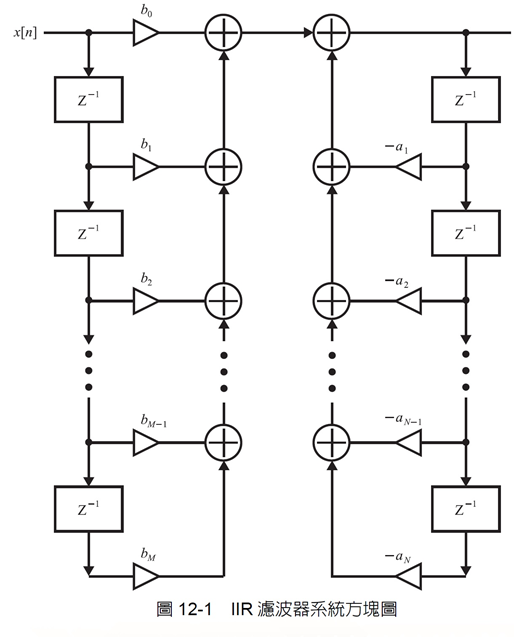
</div>

### <font color='blue'> Example </font>
Please find the transfer function of a IIR filter as follows.
\begin{equation}
y[n]=0.8y[n-1]+x[n]
\end{equation}
Sol.<br>

\begin{equation}
y[n]-0.8y[n-1]=x[n]
\end{equation}
Take Z transform, <br>

\begin{equation}
Z\{ y[n]-0.8y[n-1] \} = Z\{ x[n] \}
\end{equation}
We have $(1-0.8z^{-1})Y(z)=X(z)$, hence the system transfer function is <br>

\begin{equation}
H(z)=\frac{Y(z)}{X(z)}=\frac{1}{1-0.8 z^{-1}} 
\end{equation}

If an input signal is $x=\{1,2,1,-1,-2,-1\}, n=0,1,...,5$ as follows. 

<div>
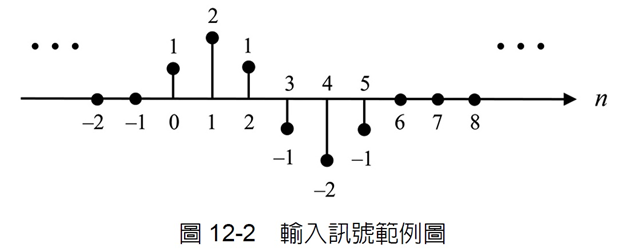
</div>

To solve a probelm of no defintion of $y[-1]$, two hypotheses are given (two inital reset conditions). <br>
1. The input signal is zero before the starting point $n_0$, that is $x[n]=0, n<n_0$. <br>
2. The output signal is zero before the starting point $n_0$, that is $y[n]=0, n<n_0$. <br>

Based on the two hypotheses, the outputs of the IIR filter are in the following. <br>
>$y[0]=0.8y[-1]+x[0] = 0.8 \cdot 0 + 1 = 1$ <br>
>$y[1]=0.8y[0]+x[1]  = 0.8 \cdot 1 + 2 = 2.8$ <br>
>$y[2]=0.8y[1]+x[2]  = 0.8 \cdot 2.8 + 1 = 3.24$ <br>
>$y[3]=0.8y[2]+x[3]  = 0.8 \cdot 3.24 - 1 = 1.592$ <br>
>$y[4]=0.8y[3]+x[4]  = 0.8 \cdot 1.592 -2 = -0.7264$ 

x = [ 1  2  1 -1 -2 -1  0  0  0  0  0  0  0  0  0]
y = [ 1.          2.8         3.24        1.592      -0.7264     -1.58112
 -1.264896   -1.0119168  -0.80953344 -0.64762675 -0.5181014  -0.41448112
 -0.3315849  -0.26526792 -0.21221433]


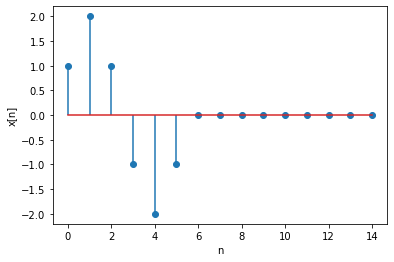

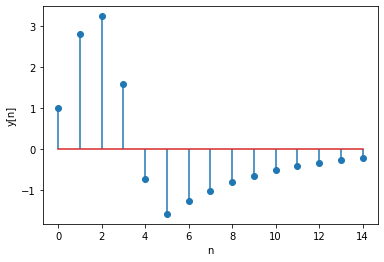

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

n = np.array( [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 ] )
x = np.array( [ 1, 2, 1, -1, -2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] )

b = np.array( [ 1 ] )
a = np.array( [ 1, -0.8 ] )
y = signal.lfilter( b, a, x )

print( "x =", x )
print( "y =", y )

plt.figure( 1 )
plt.stem( n, x )
plt.xlabel( 'n' )
plt.ylabel( 'x[n]' )

plt.figure( 2 )
plt.stem( n, y )
plt.xlabel( 'n' )
plt.ylabel( 'y[n]' )

plt.show( )

## <font color='blue'> Impusle Response</font>

Consider an IIR filter with an input signal to be unit impulse $\delta[n]$. Then, we have 

\begin{equation}
y[n]=a_1 y[n-1]+b_0x[n] = a_1 y[n-1]+b_0 \delta[n]
\end{equation}

Let $h[n]=y[n]$
Therefore, we have<br>
>$h[0] = a_1h[-1]+b_0\delta[0] = b_0 $<br>
>$h[1] = a_1h[0]+b_0\delta[1] = a_1b_0 $<br>
>$h[2] = a_1h[1]+b_0\delta[2] = (a_1)^2 b_0 $<br>
>...

In general, <br>
\begin{equation}
    h[n]=
    \begin{cases}
      b_0(a_1)^n, & n \geq 0 \\
      0, & n < 0 
    \end{cases}
\end{equation}
That is a finit input, but an infinit output is derived due to the feedback effect.

### <font color='blue'> Example </font>
Please find the impulse response of a IIR filter as follows.
\begin{equation}
y[n]=0.8y[n-1]+x[n]
\end{equation}
Sol.<br>
The system transfer function is <br>
> $H(z)=\frac{1}{1-0.8z^{-1}}$ <br>
Then, 
$h[n]=Z^{-1}\{ \frac{1}{1-0.8z^{-1}}\}=(0.8)^{n} u[n]$

x = [1 0 0 0 0 0 0 0 0 0]
y = [1.         0.8        0.64       0.512      0.4096     0.32768
 0.262144   0.2097152  0.16777216 0.13421773]


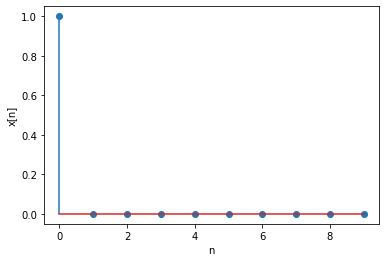

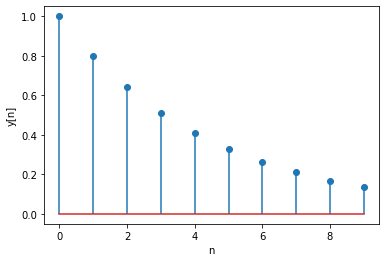

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

n = np.array( [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ] )
x = np.array( [ 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] )

b = np.array( [ 1 ] )
a = np.array( [ 1, -0.8 ] )
y = signal.lfilter( b, a, x )

print( "x =", x )
print( "y =", y )

plt.figure( 1 )
plt.stem( n, x )
plt.xlabel( 'n' )
plt.ylabel( 'x[n]' )

plt.figure( 2 )
plt.stem( n, y )
plt.xlabel( 'n' )
plt.ylabel( 'y[n]' )

plt.show( )

## <font color='blue'>Step Response</font>

Consider an IIR filter with an input signal to be unit step $u[n]$. Here
\begin{equation}
    u[n]=
    \begin{cases}
      1, & n \geq 0 \\
      0, & n < 0 
    \end{cases}
\end{equation}

Then, we have 

\begin{equation}
y[n]=a_1 y[n-1]+b_0x[n] = a_1 y[n-1]+b_0 u[n]
\end{equation}

Let $h[n]=y[n]$, we have<br>
>$h[0] = a_1h[-1]+b_0 u[0] = b_0 $<br>
>$h[1] = a_1h[0]+b_0 u[1] = a_1b_0 + b_0$<br>
>$h[2] = a_1h[1]+b_0 u[2] = (a_1)(a_1b_0 + b_0) + b_0 = b_0(1+a_1+a_1^2) $<br>
>...

In general, we can denote it as<br>
\begin{equation}
\begin{split}
h[n] &= b_0(1+a_1+a_1^2+...+a_1^n)=b_0\sum_{k=0}^{n} a_1^k  \\
     &= b_0 \frac{1-a_1^{n+1}}{1-a_1}, n\geq0, a_1\neq1\\       
\end{split}
\end{equation} 

There exits three conditions. <br>
>1. If $|a_1|>1$, then $h[n]$ is an unstable system due to increasing values of $a_1^{n+1}$.
>2. If $|a_1|<1$, then $h[n]$ is a stable system due to decreasing values of $a_1^{n+1} \to 0$. That is 

\begin{equation}
\lim_{n \to \infty} h[n] = \lim_{n \to \infty} b_0  \frac{1-a_1^{n+1}}{1-a_1} = \frac{b_0}{1-a_1}
\end{equation}
>3. When $|a_1|=1$, two conditions could be happened.
>>(a) if $a_1=1$, then $h[n]=(n+1)b_0, n \geq 0$ <br>
>>(b) if $a_1=-1$, then
\begin{equation}
    h[n]=
    \begin{cases}
      b_0, & n \text{ is even} \\
      0, & n \text{ is odd}
    \end{cases}
\end{equation}

### <font color='blue'> Example </font>
Let $a_1=0.8, b_0=1$, try to find the step response of the IIR filter.
\begin{equation}
y[n]=0.8y[n-1]+x[n]
\end{equation}

x = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y = [1.         1.8        2.44       2.952      3.3616     3.68928
 3.951424   4.1611392  4.32891136 4.46312909 4.57050327 4.65640262
 4.72512209 4.78009767 4.82407814]


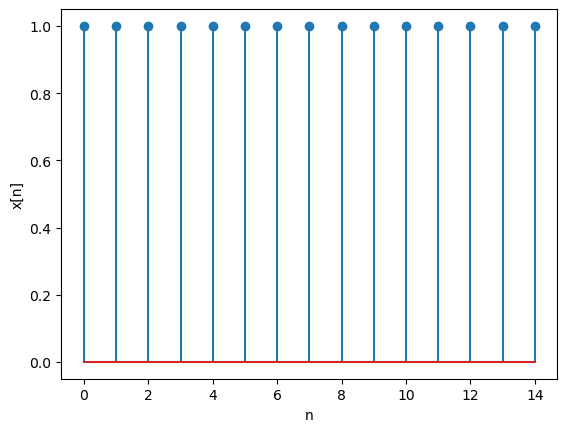

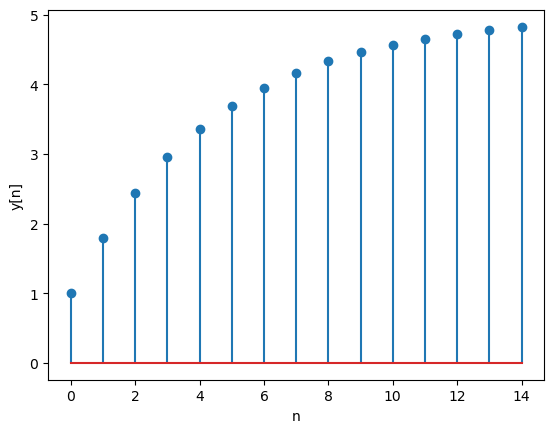

In [12]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

n = np.array( [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 ] )
x = np.ones( 15 )

b = np.array( [ 1 ] )
a = np.array( [ 1, -0.8 ] )
y = signal.lfilter( b, a, x )

print( "x =", x )
print( "y =", y )

plt.figure( 1 )
plt.stem( n, x )
plt.xlabel( 'n' )
plt.ylabel( 'x[n]' )

plt.figure( 2 )
plt.stem( n, y )
plt.xlabel( 'n' )
plt.ylabel( 'y[n]' )

plt.show( )

### <font color='blue'> IIR filter Application </font>
Assume an input signal as follows.
\begin{equation}
x(t)=Ae^{-t} \sin (2 \pi ft)
\end{equation}
where $A=1, f=5 Hz, t=[0,1]$ sec, and sampling rate is 100 Hz. Try to find the output signal for 5 sec.
If an IIR filter is designed as 
\begin{equation}
h[n]=-0.8h[n-100]-0.6h[n-200]-0.4h[n-300]-0.2h[n-400]+x[n]
\end{equation}

That is the transfer function of the IIR can be defined as
\begin{equation}
H(z)=\frac{1}{1+0.8z^{-100}+0.6z^{-200}+0.4z^{-300}+0.2z^{-400}}
\end{equation}

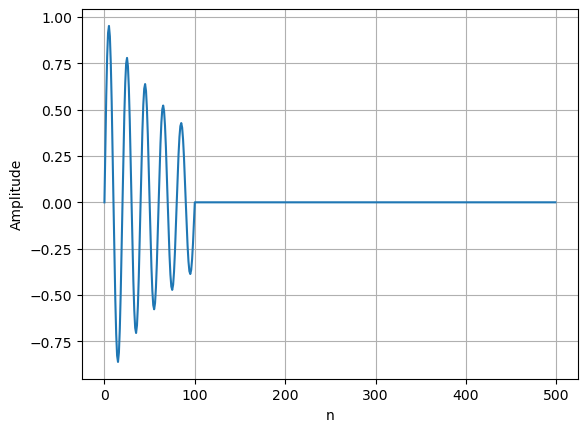

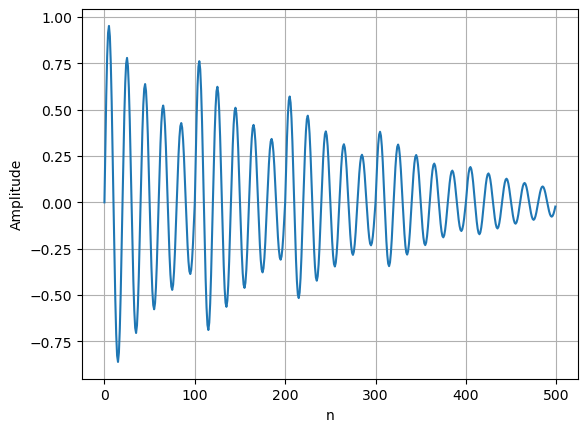

In [22]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

T = 20
fs = 100										# sampling rate
t = np.linspace( 0, 1, fs, endpoint = False )	# time span
x = np.exp( -t ) * np.sin( 2 * np.pi * 5 * t )  # input signal
x = np.pad( x, ( 0, fs * T ), 'constant' )		# pad zero

b = np.array( [ 1 ] )							# 

num_echos = 5 # T+1									# 
a = np.zeros( fs * num_echos )					# 
for i in range(num_echos):
	a[i * fs] = 1 - i *0.2 
y = signal.lfilter( x, b, a )					# 

plt.figure( 1 )									# 
plt.plot( x[0:500] )								
plt.xlabel( 'n' )
plt.ylabel( 'Amplitude' )
plt.grid()
plt.figure( 2 )
plt.plot( y )								
plt.xlabel( 'n' )
plt.ylabel( 'Amplitude' )
plt.grid()
plt.show( )

In [24]:
import numpy as np
import wave
import struct
import scipy.signal as signal

file = "sinusoid_echo.wav"	# 

amplitude = 20000           # 
frequency = 200				# 
duration = 5				# 
fs = 44100				   	# 
num_samples = duration * fs	# 
 
num_channels = 1			# 
sampwidth = 2				# 
num_frames = num_samples	# 
comptype = "NONE"		   	# 
compname = "not compressed" # 

t = np.linspace( 0, 1, fs, endpoint = False )
x = np.exp( -t ) * amplitude * np.sin( 2 * np.pi * frequency * t )
x = np.pad( x, ( 0, 4 * fs ), 'constant' )

b = np.array( [ 1 ] )
a = np.zeros( duration * fs )

num_echos = 5
for i in range( num_echos ):
	a[ int( i * fs * 5 / num_echos ) ] = 1 - i / num_echos

y = signal.lfilter( x, b, a )
y = np.clip( y, -30000, 30000 )

wav_file = wave.open( file, 'w' )
wav_file.setparams(( num_channels, sampwidth, fs, num_frames, comptype, compname )) 

for s in y :
   wav_file.writeframes( struct.pack( 'h', int ( s ) ) )

wav_file.close( ) 

## <font color='red'> Final Problem:</font>
### Reference
https://www.youtube.com/watch?v=AU3iQSAIiPo